In [65]:
import matplotlib.pyplot as plt
import time as t
import random
from prettytable import PrettyTable
import heapq as Heap

In [66]:
def prim(graph):
    mst = []
    visited = set()

    # Choose any vertex to start with and add it to the MST
    start_vertex = list(graph.keys())[0]
    visited.add(start_vertex)

    # Add all the edges connected to the start vertex to the heap
    heap = [(weight, start_vertex, neighbor) for neighbor, weight in graph[start_vertex].items()]
    Heap.heapify(heap)

    # Loop until all vertices are visited
    while heap:
        # Choose the edge with the minimum weight
        weight, u, v = Heap.heappop(heap)
        if v not in visited:
            # Add the vertex and the edge to the MST
            visited.add(v)
            mst.append((u, v, weight))
            # Add all the edges connected to the new vertex to the heap
            for neighbor, weight in graph[v].items():
                if neighbor not in visited:
                    Heap.heappush(heap, (weight, v, neighbor))

    return mst

In [67]:
class DisjointSet:
    def __init__(self, graph):
        self.parent = {x: x for x in graph.keys()}
        self.rank = {y: 0 for y in graph.keys()}

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        px, py = self.find(x), self.find(y)
        if px == py:
            return False
        if self.rank[px] < self.rank[py]:
            self.parent[px] = py
        elif self.rank[px] > self.rank[py]:
            self.parent[py] = px
        else:
            self.parent[py] = px
            self.rank[px] += 1
        return True

In [68]:
def kruskal(graph):
    # Sort all the edges of the graph by weight
    edges = []
    for u, neighbors in graph.items():
        for v, weight in neighbors.items():
            edges.append((weight, u, v))
    edges.sort()

    # Initialize the disjoint-set data structure
    dsu = DisjointSet(graph)

    # Initialize the MST as an empty list
    mst = []

    # Add each edge to the MST if it does not create a cycle
    for weight, u, v in edges:
        if dsu.union(u, v):
            mst.append((u, v, weight))

    return mst

In [69]:
# Example graph
graph = {
    '1': {'2': 2, '3': 2},
    '2': {'1': 2, '3': 1},
    '3': {'1': 2, '2': 1, '4': 4},
    '4': {'3': 4}
}

print(prim(graph))
print(kruskal(graph))

[('1', '2', 2), ('2', '3', 1), ('3', '4', 4)]
[('2', '3', 1), ('1', '2', 2), ('3', '4', 4)]


In [70]:
def get_graph_sample(nr_vertices, max_weight):
    edges_graph = []
    for i in range(1, nr_vertices):
        for j in range(i + 1, nr_vertices + 1):
            random_int = random.randrange(1, max_weight)
            edges_graph.append([i, j, random_int])
    
    return edges_graph

In [71]:
def get_graph_def(edges: list) -> dict:
    graph = {}
    for edge_def in edges:
        i, j, w = int(edge_def[0]), int(edge_def[1]), int(edge_def[2])
        if i not in graph:
            graph[i] = {j: w}
        else:
            graph[i][j] = w

        if j not in graph:
            graph[j] = {i: w}
        else:
            graph[j][i] = w
    return graph

In [72]:
edges_graph = get_graph_sample(6, 100)

In [73]:
G = get_graph_def(edges_graph)
G

{1: {2: 8, 3: 75, 4: 69, 5: 79, 6: 98},
 2: {1: 8, 3: 83, 4: 80, 5: 75, 6: 39},
 3: {1: 75, 2: 83, 4: 56, 5: 32, 6: 75},
 4: {1: 69, 2: 80, 3: 56, 5: 55, 6: 38},
 5: {1: 79, 2: 75, 3: 32, 4: 55, 6: 35},
 6: {1: 98, 2: 39, 3: 75, 4: 38, 5: 35}}

In [74]:
print(prim(G))
print(kruskal(G))

[(1, 2, 8), (2, 6, 39), (6, 5, 35), (5, 3, 32), (6, 4, 38)]
[(1, 2, 8), (3, 5, 32), (5, 6, 35), (4, 6, 38), (2, 6, 39)]


In [75]:
sample_size = [x for x in range(2, 201)]

In [76]:
ellapsed_time_prim = []
ellapsed_time_kruskal = []
for n in sample_size:
  edges = get_graph_sample(n, 100)
  graph = get_graph_def(edges)
  
  start = t.time()
  prim(graph)
  end = t.time()

  ellapsed_time_prim.append(end-start)

  start = t.time()
  kruskal(graph)
  end = t.time()

  ellapsed_time_kruskal.append(end-start)

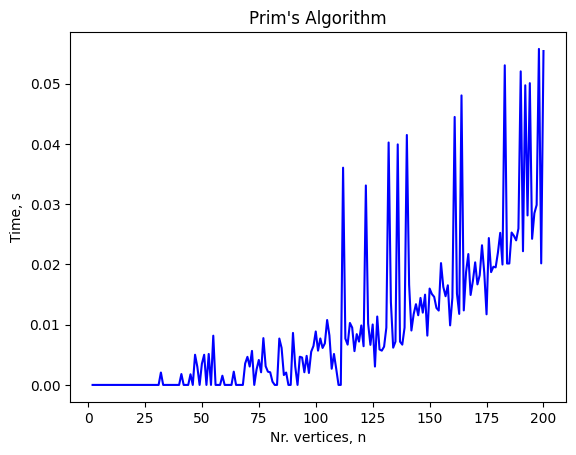

In [77]:
fig, ax = plt.subplots()

ax.plot(sample_size, ellapsed_time_prim, linewidth=1.5, color="blue", markersize=4.2)
ax.set_xlabel("Nr. vertices, n")
ax.set_ylabel("Time, s")
ax.set_title("Prim's Algorithm")

plt.show()

In [78]:
table = PrettyTable()
table.field_names = ["Nr.vertices, n"] + sample_size[::18]
table.add_row(["Time, s"] + [round(x, 4) for x in ellapsed_time_prim[::18]])
table

"Nr.vertices, n",2,20,38,56,74,92,110,128,146,164,182,200
"Time, s",0.0,0.0,0.0,0.0,0.0025,0.0,0.0,0.0059,0.0144,0.048,0.02,0.0554


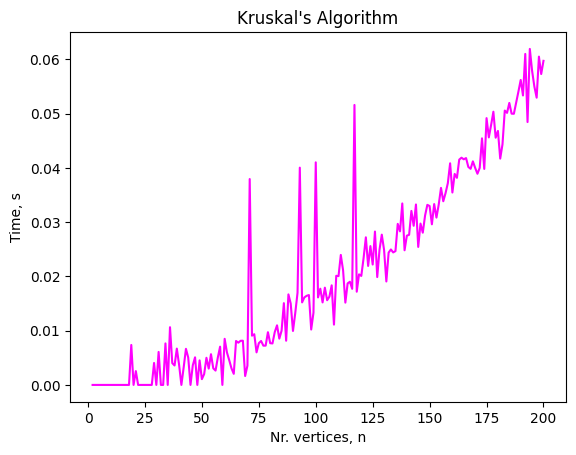

In [79]:
fig, ax = plt.subplots()

ax.plot(sample_size, ellapsed_time_kruskal, linewidth=1.5, color="magenta", markersize=4.2)
ax.set_xlabel("Nr. vertices, n")
ax.set_ylabel("Time, s")
ax.set_title("Kruskal's Algorithm")

plt.show()

In [80]:
table = PrettyTable()
table.field_names = ["Nr.vertices, n"] + sample_size[::18]
table.add_row(["Time, s"] + [round(x, 4) for x in ellapsed_time_kruskal[::18]])
table

"Nr.vertices, n",2,20,38,56,74,92,110,128,146,164,182,200
"Time, s",0.0,0.0,0.0036,0.0026,0.006,0.017,0.02,0.0249,0.0297,0.0419,0.0443,0.0597


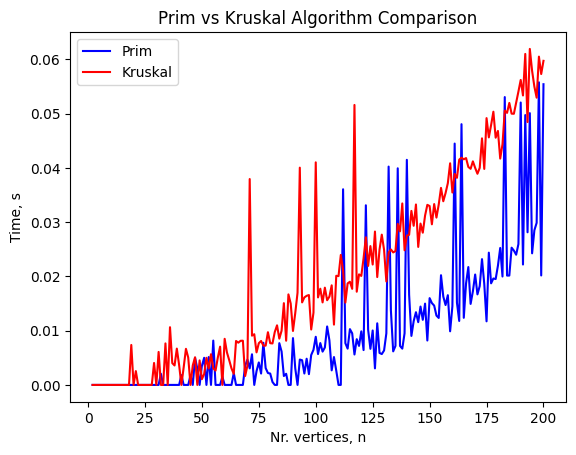

In [81]:
# plotting multiple curves simultaneously
plt.plot(sample_size, ellapsed_time_prim, color='b', label='Prim')
plt.plot(sample_size, ellapsed_time_kruskal, color='r', label='Kruskal')
  
plt.xlabel("Nr. vertices, n")
plt.ylabel("Time, s")
plt.title("Prim vs Kruskal Algorithm Comparison")
  
plt.legend()  
plt.show()